# Machine Learning and Computer Vision
## Assigment 4

---

This assignment contains Tensorflow programming exercises.



## Problem 1: Install Tensorflow
Follow the directions on https://www.tensorflow.org/install/ to install Tensorflow on your computer.

Note: You will not need GPU support for this assignment so don't worry if you don't have one. Furthermore, installing with GPU support is often more difficult to configure so it is suggested that you install the CPU only version. However, if you have a GPU and would like to install GPU support feel free to do so at your own risk :)

Note: On windows, Tensorflow is only supported in python3, so you will need to install python3 for this assignment.

Run the following cell to verify your instalation.

In [1]:
#import tensorflow as tf
import tensorflow as tf
print(tf.__version__)

import tensorflow as tf
print(tf.__version__)

hello = tf.constant('Hello, TensorFlow!')
print(hello.numpy())

2.18.0
2.18.0
b'Hello, TensorFlow!'


In [2]:

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.config.list_physical_devices())

Num GPUs Available:  0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


## Problem 2: Downloading CIFAR10
Download the CIFAR10 dataset (http://www.cs.toronto.edu/~kriz/cifar.html). You will need the python version: http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

Extract the data to ./data
Once extracted run the following cell to view a few example images.

In [3]:
import os
print(os.getcwd())

/content


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


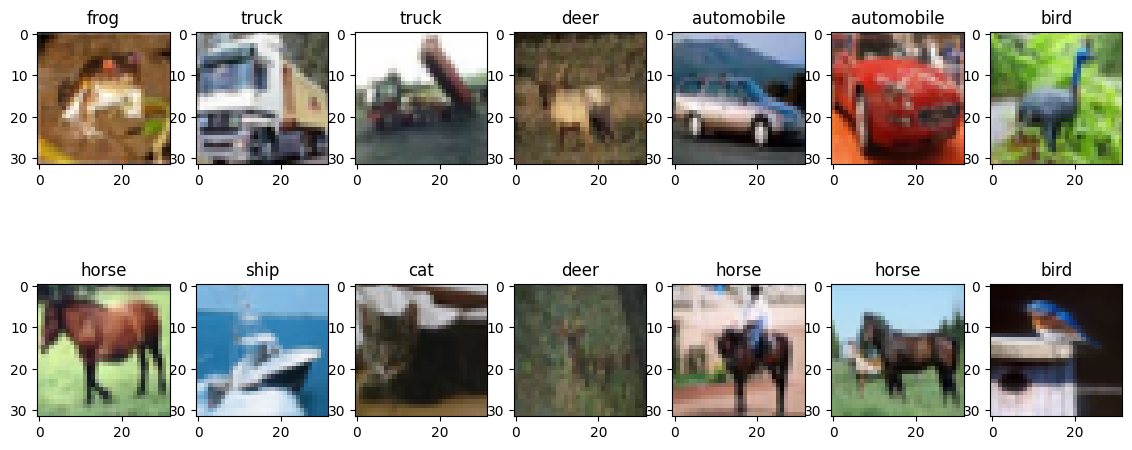

train shape: (50000, 32, 32, 3), (50000,)
test shape : (10000, 32, 32, 3), (10000,)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# 加载数据
(trainData, trainLabels), (testData, testLabels) = cifar10.load_data()
trainLabels = trainLabels.flatten()   # 转成一维
testLabels = testLabels.flatten()

# CIFAR-10 类别名
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

# 展示部分图片
plt.figure(figsize=(14, 6))
for i in range(14):
    plt.subplot(2, 7, i+1)
    plt.imshow(trainData[i])
    plt.title(classes[trainLabels[i]])
plt.show()

print('train shape: ' + str(trainData.shape) + ', ' + str(trainLabels.shape))
print('test shape : ' + str(testData.shape) + ', ' + str(testLabels.shape))


Below are some helper functions that will be used in the following problems.

In [5]:
# a generator for batches of data
# yields data (batchsize,  32, 32, 3) and labels (batchsize)
# if shuffle, it will load batches in a random order
def DataBatch(data, label, batchsize, shuffle=True):
    n = data.shape[0]
    if shuffle:
        index = np.random.permutation(n)
    else:
        index = np.arange(n)
    for i in range(int(np.ceil(n/batchsize))):
        inds = index[i*batchsize : min(n,(i+1)*batchsize)]
        yield data[inds], label[inds]

# tests the accuracy of a classifier
def test(testData, testLabels, classifier):
    batchsize=50
    correct=0.
    for data,label in DataBatch(testData,testLabels,batchsize):
        prediction = classifier(data)
        #print (prediction)
        correct += np.sum(prediction==label)
    return correct/testData.shape[0]*100

# a sample classifier
# given an input it outputs a random class
class RandomClassifier():
    def __init__(self, classes=10):
        self.classes=classes
    def tain():
        pass

    def __call__(self, x):
        return np.random.randint(self.classes, size=x.shape[0])

randomClassifier = RandomClassifier()
print ('Random classifier accuracy: %f'%test(testData, testLabels, randomClassifier))

Random classifier accuracy: 10.050000


## Problem 3: Confusion Matirx
Here you will implement a test script that computes the confussion matrix for a classifier.
The matrix should be nxn where n is the number of classes.
Entry M[i,j] should contain the number of times an image of class i was classified as class j.
M should be normalized such that each row sums to 1.

Hint: see the function test() above for reference.

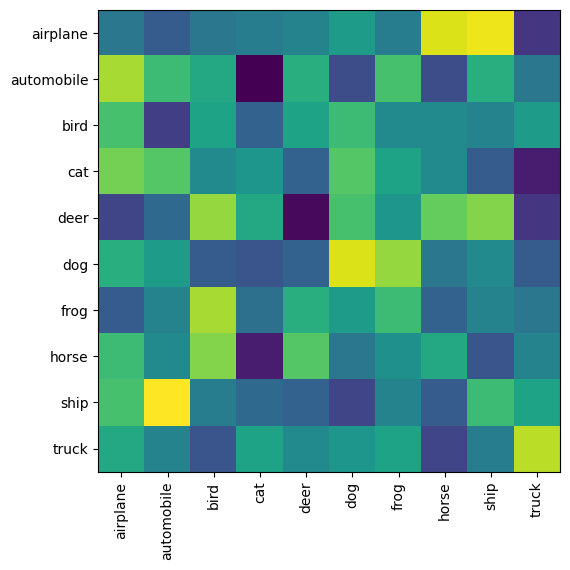

In [6]:
def confusion(testData, testLabels, classifier):
    # Step 1: Get number of classes
    n_classes = np.max(testLabels) + 1

    # Step 2: Initialize confusion matrix
    M = np.zeros((n_classes, n_classes))

    # Step 3: Get predictions from classifier
    predictions = classifier(testData)

    # Step 4: Fill the confusion matrix
    for true, pred in zip(testLabels, predictions):
        M[true, pred] += 1

    # Step 5: Normalize each row to sum to 1 (avoid divide by zero)
    row_sums = M.sum(axis=1, keepdims=True)
    M = np.divide(M, row_sums, where=row_sums!=0)

    return M

def VisualizeConfussion(M):
    plt.figure(figsize=(14, 6))
    plt.imshow(M)#, vmin=0, vmax=1)
    plt.xticks(np.arange(len(classes)), classes, rotation='vertical')
    plt.yticks(np.arange(len(classes)), classes)
    plt.show()

M = confusion(testData, testLabels, randomClassifier)
VisualizeConfussion(M)

## Problem 4: K-Nearest Neighbors (KNN)
Here you will implemnet a simple knn classifer. The distance metric is euclidian in pixel space. k refers to the number of neighbors involved in voting on the class.

Hint: you may want to use: sklearn.neighbors.KNeighborsClassifier

In [7]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

class KNNClassifier():
    def __init__(self, k=3):
        # Initialize k and the classifier
        self.k = k
        self.clf = KNeighborsClassifier(n_neighbors=self.k)
        self.is_trained = False

    def train(self, trainData, trainLabels):
        # Flatten each image to 1D (samples, features)
        X = trainData.reshape((trainData.shape[0], -1))
        y = trainLabels
        self.clf.fit(X, y)
        self.is_trained = True

    def __call__(self, x):
        # Predict for a batch of images
        X = x.reshape((x.shape[0], -1))
        preds = self.clf.predict(X)
        return preds


# test your classifier with only the first 100 training examples (use this while debugging)
# note you should get around 10-20% accuracy
knnClassiferX = KNNClassifier()
knnClassiferX.train(trainData[:100], trainLabels[:100])
print ('KNN classifier accuracy: %f'%test(testData, testLabels, knnClassiferX))

KNN classifier accuracy: 16.600000


## Deep learning
Below is some helper code to train your deep networks

Hint: see https://www.tensorflow.org/get_started/mnist/pros or https://www.tensorflow.org/get_started/mnist/beginners for reference

In [8]:
class MLPClassifier(tf.keras.Model):
    def __init__(self, classes=10, hidden=100):
        super().__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(hidden, activation='relu')
        self.dense2 = tf.keras.layers.Dense(classes)  # 输出层，不加激活（from_logits=True）

    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        return x

# 实例化
mlpClassifier = MLPClassifier(classes=10, hidden=100)

# 编译
mlpClassifier.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# 训练
mlpClassifier.fit(trainData, trainLabels, epochs=20, batch_size=50, validation_split=0.1)

# 预测
y_pred = mlpClassifier.predict(testData).argmax(axis=1)

# 混淆矩阵
from sklearn.metrics import confusion_matrix
M = confusion_matrix(testLabels, y_pred)
# VisualizeConfussion(M)


Epoch 1/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.1561 - loss: 33.3648 - val_accuracy: 0.0964 - val_loss: 2.3305
Epoch 2/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1009 - loss: 2.3321 - val_accuracy: 0.0968 - val_loss: 2.3140
Epoch 3/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.0989 - loss: 2.3065 - val_accuracy: 0.0972 - val_loss: 2.3096
Epoch 4/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1020 - loss: 2.3040 - val_accuracy: 0.0952 - val_loss: 2.3118
Epoch 5/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.0988 - loss: 2.3021 - val_accuracy: 0.0950 - val_loss: 2.3125
Epoch 6/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.1032 - loss: 2.3021 - val_accuracy: 0.0950 - val_loss: 2.3104
Epoch 7/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1022 - loss: 2.3003 - val_accuracy: 0.0952 - val_loss: 2.3110
Epoch 8/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1011 - loss: 2.3010 - val_accuracy:

## Problem 5: Multi Layer Perceptron (MLP)
Here you will implement an MLP. The MLP shoud consist of 3 linear layers (matrix multiplcation and bias offset) that map to the following feature dimensions:

32x32x3 -> hidden

hidden -> hidden

hidden -> classes

The first two linear layers should be followed with a ReLU nonlinearity. The final layer should not have a nonlinearity applied as we desire the raw logits output (see: the documentation for tf.nn.sparse_softmax_cross_entropy_with_logits used in the training)

The final output of the computation graph should be stored in self.y as that will be used in the training.

Hint: see the example linear classifier

Note: you should get around 50% accuracy

In [9]:
class MLPClassifier(tf.keras.Model):
    def __init__(self, classes=10, hidden=100):
        super().__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(hidden, activation='relu')
        self.dense2 = tf.keras.layers.Dense(classes)  # 输出 logits

    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        return x

# 实例化
mlpClassifier = MLPClassifier(classes=10, hidden=100)

# 编译
mlpClassifier.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# 训练
mlpClassifier.fit(trainData, trainLabels, epochs=20, batch_size=50, validation_split=0.1)

# 预测
y_pred = mlpClassifier.predict(testData).argmax(axis=1)

# 混淆矩阵
from sklearn.metrics import confusion_matrix
M = confusion_matrix(testLabels, y_pred)
# 可视化
# VisualizeConfussion(M)

Epoch 1/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.1625 - loss: 40.7751 - val_accuracy: 0.0980 - val_loss: 2.3655
Epoch 2/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1008 - loss: 2.3486 - val_accuracy: 0.0964 - val_loss: 2.3288
Epoch 3/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1011 - loss: 2.3114 - val_accuracy: 0.0960 - val_loss: 2.3235
Epoch 4/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1017 - loss: 2.3034 - val_accuracy: 0.0960 - val_loss: 2.3153
Epoch 5/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.1034 - loss: 2.3012 - val_accuracy: 0.0958 - val_loss: 2.3134
Epoch 6/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1014 - loss: 2.3007 - val_accuracy: 0.0962 - val_loss: 2.3131
Epoch 7/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1024 - loss: 2.3032 - val_accuracy: 0.0960 - val_loss: 2.3132
Epoch 8/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1018 - loss: 2.3005 - val_accuracy:

## Problem 6: Convolutional Neural Netork (CNN)
Here you will implement a CNN with the following architecture:

ReLU( Conv(kernel_size=4x4 stride=2, output_features=n) )

ReLU( Conv(kernel_size=4x4 stride=2, output_features=n*2) )

ReLU( Conv(kernel_size=4x4 stride=2, output_features=n*4) )

Linear(output_features=classes)

In [11]:
import tensorflow as tf

class CNNClassifier(tf.keras.Model):
    def __init__(self, classes=10, n=16):
        super().__init__()
        self.conv1 = tf.keras.layers.Conv2D(n, 3, strides=2, padding='same', activation='relu')
        self.conv2 = tf.keras.layers.Conv2D(n*2, 3, strides=2, padding='same', activation='relu')
        self.conv3 = tf.keras.layers.Conv2D(n*4, 3, strides=2, padding='same', activation='relu')
        self.flatten = tf.keras.layers.Flatten()
        self.fc = tf.keras.layers.Dense(classes)

    def call(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.flatten(x)
        x = self.fc(x)
        return x

# 数据类型和范围要标准化！
trainData = trainData.astype('float32') / 255.0
testData = testData.astype('float32') / 255.0

cnnClassifier = CNNClassifier(classes=10, n=16)
cnnClassifier.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
cnnClassifier.fit(trainData, trainLabels, epochs=20, batch_size=50, validation_split=0.1)


Epoch 1/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.2135 - loss: 2.1649 - val_accuracy: 0.3624 - val_loss: 1.8224
Epoch 2/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.3778 - loss: 1.7778 - val_accuracy: 0.4132 - val_loss: 1.6787
Epoch 3/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.4234 - loss: 1.6543 - val_accuracy: 0.4414 - val_loss: 1.5981
Epoch 4/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.4422 - loss: 1.5786 - val_accuracy: 0.4490 - val_loss: 1.5482
Epoch 5/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - accuracy: 0.4600 - loss: 1.5212 - val_accuracy: 0.4708 - val_loss: 1.4922
Epoch 6/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.4771 - loss: 1.4747 - val_accuracy: 0.4828 - val_loss: 1.4518
Epoch 7/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.4955 - loss: 1.4351 - val_accuracy: 0.4990 - val_loss: 1.4350
Epoch 8/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.4971 - loss: 1.4119 - 

In [12]:


# 预测
y_pred = cnnClassifier.predict(testData).argmax(axis=1)

# 混淆矩阵
from sklearn.metrics import confusion_matrix
M = confusion_matrix(testLabels, y_pred)
# 可视化
# VisualizeConfussion(M)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [13]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(testLabels, y_pred)
print('CNN classifier accuracy:', acc)


CNN classifier accuracy: 0.5521


In [14]:
print('Confusion Matrix:')
print(M)


Confusion Matrix:
[[615  29  41  29  21  14  24  22 147  58]
 [ 37 626   7  19  10   6  12  17  62 204]
 [ 84   9 366 104 136  91 101  58  30  21]
 [ 29  17  70 406  77 176 115  62  17  31]
 [ 41   6 105  77 445  56 132  95  33  10]
 [ 17   5  77 209  65 427  77  84  31   8]
 [  7   8  48  92  62  36 685  22  14  26]
 [ 23   5  35  65  76  85  43 612  15  41]
 [125  45  13  24   9   9  12   9 694  60]
 [ 54 127   8  20  10  18  28  36  54 645]]


CNN classifier accuracy: 0.5521
Confusion Matrix:
[[615  29  41  29  21  14  24  22 147  58]
 [ 37 626   7  19  10   6  12  17  62 204]
 [ 84   9 366 104 136  91 101  58  30  21]
 [ 29  17  70 406  77 176 115  62  17  31]
 [ 41   6 105  77 445  56 132  95  33  10]
 [ 17   5  77 209  65 427  77  84  31   8]
 [  7   8  48  92  62  36 685  22  14  26]
 [ 23   5  35  65  76  85  43 612  15  41]
 [125  45  13  24   9   9  12   9 694  60]
 [ 54 127   8  20  10  18  28  36  54 645]]


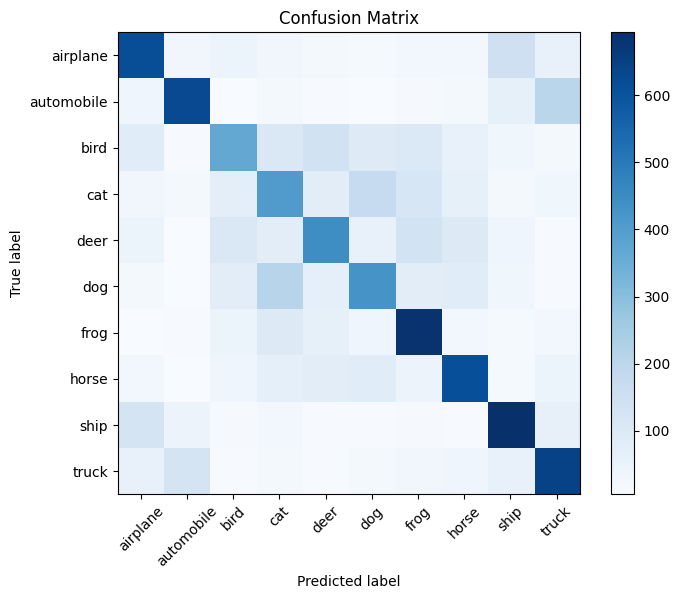

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix

# 输出准确率
acc = accuracy_score(testLabels, y_pred)
print('CNN classifier accuracy:', acc)

# 输出混淆矩阵
M = confusion_matrix(testLabels, y_pred)
print('Confusion Matrix:')
print(M)

# 可视化
plt.figure(figsize=(8, 6))
plt.imshow(M, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']
plt.xticks(np.arange(len(classes)), classes, rotation=45)
plt.yticks(np.arange(len(classes)), classes)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


## Conclusion

Have you accomplished all parts of your assignment? What concepts did you used or learned in this assignment? What difficulties have you encountered? Explain your result for each section. Please wirte one or two short paragraph in the below Markdown window (double click to edit).

**** Your Conclusion: ****

--




## Further reference
To see how state of the art deep networks do on this dataset see: https://github.com/tensorflow/models/tree/master/research/resnet